In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/User/Downloads/all-data.csv", encoding="latin1")
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [5]:
df.isna().sum()

neutral                                                                                                                            0
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    0
dtype: int64

In [6]:
print(df.columns)

Index(['neutral', 'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'], dtype='object')


In [7]:
df.rename(columns={'neutral': 'Sentiment'}, inplace=True)

In [8]:
df.rename(columns={'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .': 'News Headline'}, inplace=True)

In [9]:
df['Sentiment'].value_counts()

Sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

In [10]:
y=df['Sentiment'].values
y.shape

(4845,)

In [11]:
x=df['News Headline'].values
x.shape

(4845,)

In [12]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(1938,)

In [13]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'Sentiment'})
df_train=pd.concat([df1,df2],axis=1)
df_train.head()

,news,Sentiment
0,Finnish fibers and plastic products maker Suom...,positive
1,Russian officials inspected the damage and gav...,neutral
2,The customer is local company Etera Mutual Pen...,neutral
3,`` The considerably weaker U.S. dollar and Bri...,negative
4,The proposal of the shareholders to elect Mr. ...,neutral


In [14]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'Sentiment'})
df_test=pd.concat([df3,df4],axis=1)
df_test.head()

,news,Sentiment
0,"Deliveries of Nokia 1112 , Nokia 2310 and Noki...",positive
1,To be number one means creating added value fo...,neutral
2,We also strengthen our existing partnership wi...,neutral
3,"In the Baltics , the merger of the businesses ...",negative
4,Previously the company has estimated its opera...,neutral


In [15]:
import string
def remove_punctuation(text):
    if isinstance(text,float):
        return text
    ans=""
    for i in text:
        if i not in string.punctuation:
            ans+=i
    return ans
df_train['news'] = df_train['news'].apply(remove_punctuation)
df_test['news'] = df_test['news'].apply(remove_punctuation)
df_train.head()

,news,Sentiment
0,Finnish fibers and plastic products maker Suom...,positive
1,Russian officials inspected the damage and gav...,neutral
2,The customer is local company Etera Mutual Pen...,neutral
3,The considerably weaker US dollar and British...,negative
4,The proposal of the shareholders to elect Mr H...,neutral


In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
def generate_N_grams(text, ngram=1):
    # Remove stopwords
    words = [word for word in text.split() if word.lower() not in set(stopwords.words('english'))]

    print("Sentence after removing stopwords:", words)  # Debugging step

    # Generate n-grams
    temp = zip(*[words[i:] for i in range(ngram)])
    ans = [" ".join(ngram) for ngram in temp]
    
    return ans  # Return n-grams

# Example usage
sentence = "This is a sample sentence for n-gram generation"
ngrams = generate_N_grams(sentence, 2)
print("Generated n-grams:", ngrams)


Sentence after removing stopwords: ['sample', 'sentence', 'n-gram', 'generation']
Generated n-grams: ['sample sentence', 'sentence n-gram', 'n-gram generation']


In [18]:
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['sun', 'rises', 'east']


['sun rises', 'rises east']

In [19]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)

In [20]:
for text in df_train[df_train.Sentiment=="positive"].news:
    for word in generate_N_grams(text):
        positiveValues[word]+=1       

Sentence after removing stopwords: ['Finnish', 'fibers', 'plastic', 'products', 'maker', 'Suominen', 'Corporation', 'said', 'net', 'loss', 'continuing', 'operations', 'narrowed', '18', 'mln', 'euro', '23', 'mln', '2006', '37', 'mln', 'euro', '48', 'mln', '2005']
Sentence after removing stopwords: ['Nevertheless', 'Fitch', 'notes', 'business', 'fundamentals', 'three', 'banks', 'currently', 'remain', 'sound']
Sentence after removing stopwords: ['Construction', 'volumes', 'meanwhile', 'grow', 'rate', '1015', 'percent', 'annually']
Sentence after removing stopwords: ['Finnish', 'government', 'announced', 'Wednesday', 'sold', '32', 'percent', 'stake', 'chemicals', 'fertilizer', 'group', 'Kemira', 'Oyj', 'x20ac', '6556', 'million', '890US', 'million', 'sending', 'company', 'share', 'price', '6', 'percent']
Sentence after removing stopwords: ['Finnish', 'financial', 'group', 'Aktia', 'reports', 'operating', 'profit', 'EUR', '444', 'mn', 'JanuarySeptember', '2009', 'EUR', '373', 'mn', 'corresp

In [21]:
for text in df_train[df_train.Sentiment=="negative"].news:
    for word in generate_N_grams(text):
        negativeValues[word]+=1

Sentence after removing stopwords: ['considerably', 'weaker', 'US', 'dollar', 'British', 'pound', 'impact', 'sales', 'average', 'prices', 'euros', 'UPM', 'said']
Sentence after removing stopwords: ['JP', 'Morgan', 'expects', 'Scala', 'lower', 'Nobel', 'Biocare', 'growth', 'forecast', '2007', 'current', 'guidance', '2325', 'pct', 'well', 'operating', 'margin', 'target', 'current', '3435', 'pct']
Sentence after removing stopwords: ['current', 'reference', 'grade', 'instruments', 'challenging', 'operate', 'due', 'high', 'price', 'complexity', 'routine', 'use']
Sentence after removing stopwords: ['Raute', 'reported', 'loss', 'per', 'share', 'EUR0', '86', 'first', 'half', '2009', 'EPS', 'EUR0', '74', 'corresponding', 'period', '2008']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EPS', 'amounted', 'loss', 'EUR0', '06']
Sentence after removing stopwords: ['group', 'operating', 'loss', 'EUR', '08', 'mn', 'profit', 'EUR', '25', 'mn', '2004']
Sentence after removing stopwords

In [22]:
for text in df_train[df_train.Sentiment=="neutral"].news:
    for word in generate_N_grams(text):
        neutralValues[word]+=1

Sentence after removing stopwords: ['Russian', 'officials', 'inspected', 'damage', 'gave', 'vessel', 'permission', 'continue', 'Tallinn', 'around', '430', 'Norwegianregistered', 'MT', 'Sten', 'Nordic', 'carrying', '11000', 'tons', 'gas', 'oil', 'manned', 'Filipino', 'crew']
Sentence after removing stopwords: ['customer', 'local', 'company', 'Etera', 'Mutual', 'Pension', 'Insurance', 'Co', 'principal', 'tenant', 'unit', 'media', 'company', 'Alma', 'Media', 'Corp', 'HEL', 'ALN1V']
Sentence after removing stopwords: ['proposal', 'shareholders', 'elect', 'Mr', 'Hannu', 'Krogerus', 'Board', 'based', 'long', 'unrivalled', 'experience', 'knowledge', 'matters', 'related', 'Elcoteq']
Sentence after removing stopwords: ['total', '30', 'order', 'value', 'booked', 'fourth', 'quarter', '2009', 'remainder', 'booked', 'second', 'quarter', '2010']
Sentence after removing stopwords: ['study', 'expected', 'provide', 'proof', 'pharmacodynamic', 'activity', 'humans', 'corroborate', 'safety', 'profile', 'e

In [23]:
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [24]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

In [25]:
import matplotlib.pyplot as plt

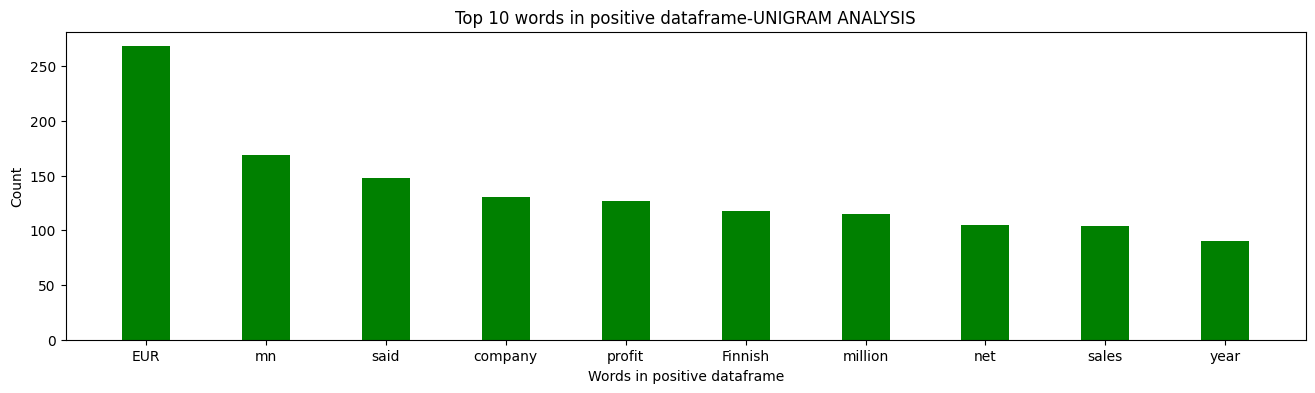

In [26]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2,color='green',width=0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

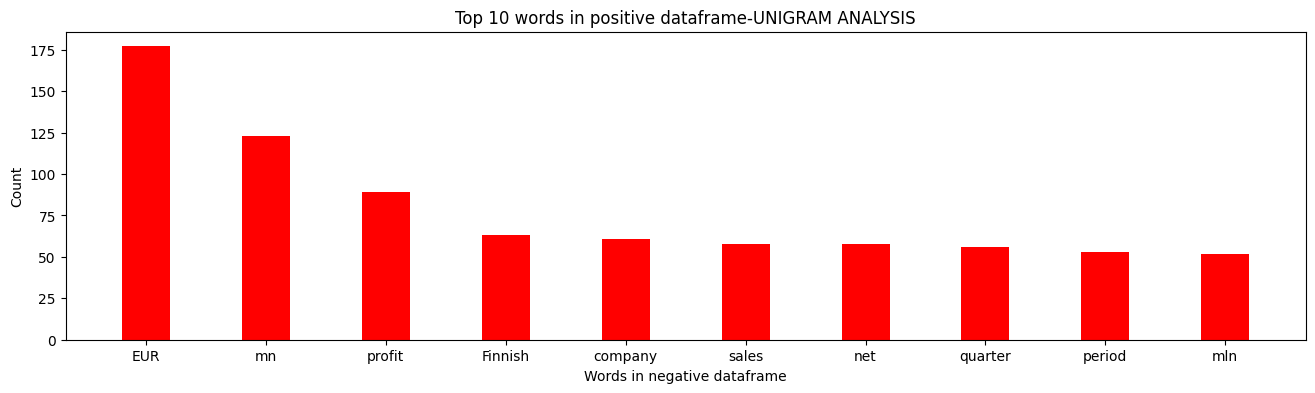

In [27]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2,color='red',width=0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

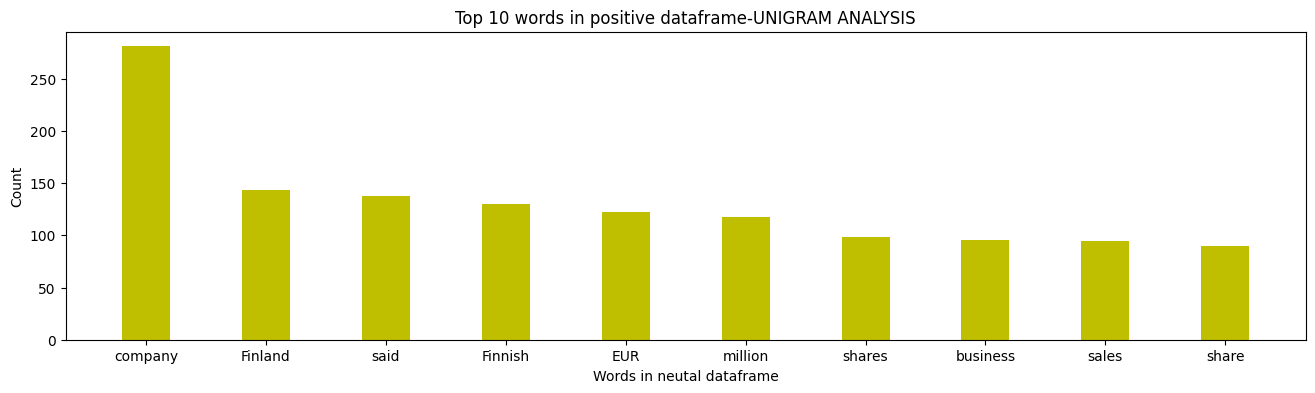

In [28]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2,color='y',width=0.4)
plt.xlabel("Words in neutal dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [29]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)

In [67]:
for text in df_train[df_train.Sentiment=="positive"].news:
    for word in generate_N_grams(text,2):
        positiveValues[word]+=1  

Sentence after removing stopwords: ['Divisional', 'sales', 'demand', 'half', 'remained', 'inconsistent', 'added']
Sentence after removing stopwords: ['January', '11', '2010', 'EPHC', 'board', 'directors', 'approved', 'increase', 'quarterly', 'dividend', '003', '005', 'per', 'share']
Sentence after removing stopwords: ['equipment', 'designated', 'Bollore', 'Africa', 'Logistics', 'terminal', 'Societe', 'dExploitation', 'du', 'Terminal', 'de', 'Vridi', 'SETV', 'Abidjan', 'Ivory', 'Coast', 'delivery', 'scheduled', 'start', 'March', '2010']
Sentence after removing stopwords: ['Sales', 'improved', 'SEK', '1553', 'mn', 'compared', 'SEK', '1408', 'mn']
Sentence after removing stopwords: ['plant', 'scheduled', 'completion', 'late', 'February', '2007', 'hand', 'areas', 'January', 'Two', 'suppliers', 'Nokia', 'Aspocomp', 'Group', 'Oyj', 'Perlos', 'announced', 'plans', 'establish', 'plants', 'within', 'Nokia', 'complex', 'Together', 'invest', 'Rs', '365', 'crore']
Sentence after removing stopwords

AttributeError: 'float' object has no attribute 'split'

In [68]:
for text in df_train[df_train.Sentiment=="negative"].news:
    for word in generate_N_grams(text,2):
        negativeValues[word]+=1

Sentence after removing stopwords: ['Saunalahti', 'part', 'Elisa', 'group']
Sentence after removing stopwords: ['Group', 'revenue', '2009', 'amounted', 'EUR', '70', 'million', 'company', 'currently', 'employs', 'approximately', '780', 'people']
Sentence after removing stopwords: ['Karachi', 'Sept', '14', 'Ixonos', 'world', 'leader', 'development', 'integration', 'solutions', 'handheld', 'devices', 'announced', 'implementing', 'touch', 'screen', 'mobile', 'user', 'interface', 'solution', 'Intel', 'Atom', 'processor', 'Z6xx', 'based', 'smartphones']
Sentence after removing stopwords: ['Device', 'volume', 'area', 'decreased', '21', '27', 'mn', 'units']
Sentence after removing stopwords: ['Solvay', 'SA', 'engaged', 'Poyry', 'provide', 'project', 'management', 'engineering', 'procurement', 'site', 'services', 'hydrogen', 'peroxide', 'production', 'plant', 'built', 'SolvayBASF', 'joint', 'venture', 'BASF', 'Zandvliet', 'site', 'Belgium']
Sentence after removing stopwords: ['Finnish', 'home',

AttributeError: 'float' object has no attribute 'split'

In [71]:
for text in df_train[df_train.Sentiment=="neutral"].news:
    for word in generate_N_grams(text,2):
        neutralValues[word]+=1

Sentence after removing stopwords: ['Dealers', 'said', 'share', 'largely', 'hit', 'investor', 'disappointment', 'refining', 'margin', '948', 'usd', 'per', 'barrel', 'quarter', 'performance', 'shipping', 'unit', 'saw', 'EBIT', 'drop', '5', 'mln', 'eur', '20', 'mln', 'eur', 'year', 'amid', 'fall', 'volumes', 'tanker', 'rates']
Sentence after removing stopwords: ['Myllykoski', 'one', 'paper', 'plant', 'Finland', 'one', 'US', 'three', 'Germany', 'revenues', 'EUR286m', 'first', 'half', '2010', 'operating', 'loss', 'EUR12m', 'Reuters', 'said']
Sentence after removing stopwords: ['Overall', 'pleased', 'startup', 'curve', 'pleased', 'quality', 'paper', 'Stora', 'spokeswoman', 'Patricia', 'Dietz', 'said', 'Tuesday']
Sentence after removing stopwords: ['company', 'advantage', 'pricing', 'seen', 'significantly', 'lower', 'prices', 'offered', 'new', 'unmanned', 'stations']
Sentence after removing stopwords: ['Finnish', 'Vacon', 'signed', 'significant', 'deals', 'Norwegian', 'Scandinavian', 'Electr

AttributeError: 'float' object has no attribute 'split'

In [73]:
df_positive2=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [74]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

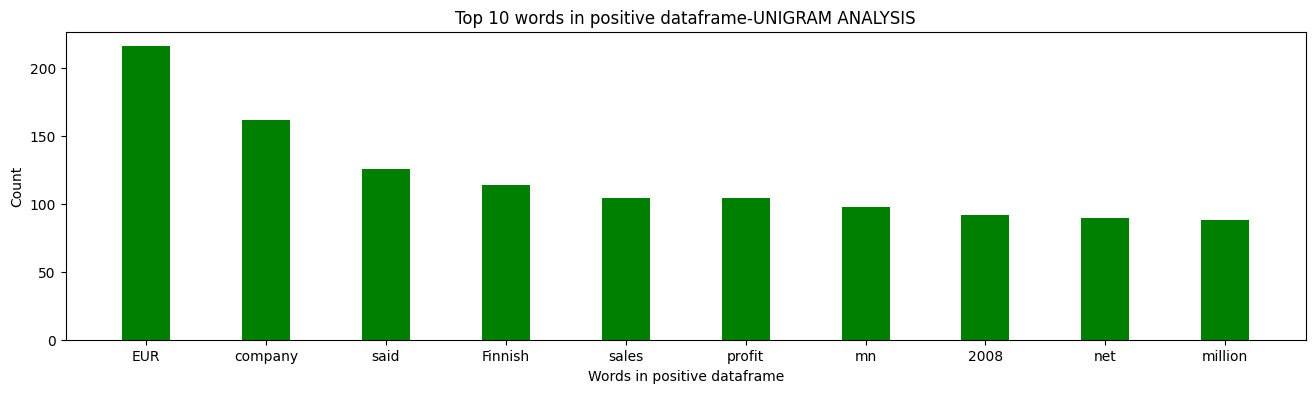

In [75]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi,color='green',width=0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

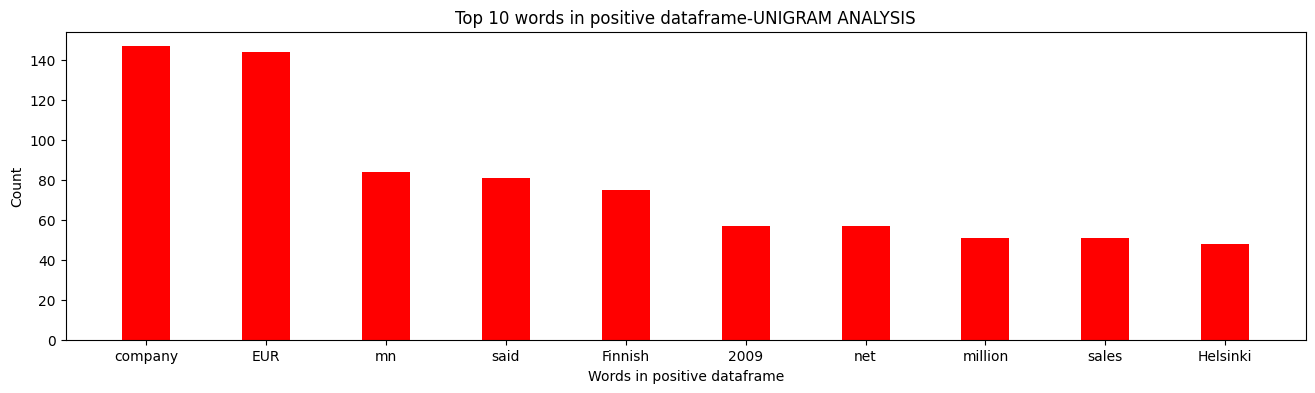

In [76]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi,color='r',width=0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

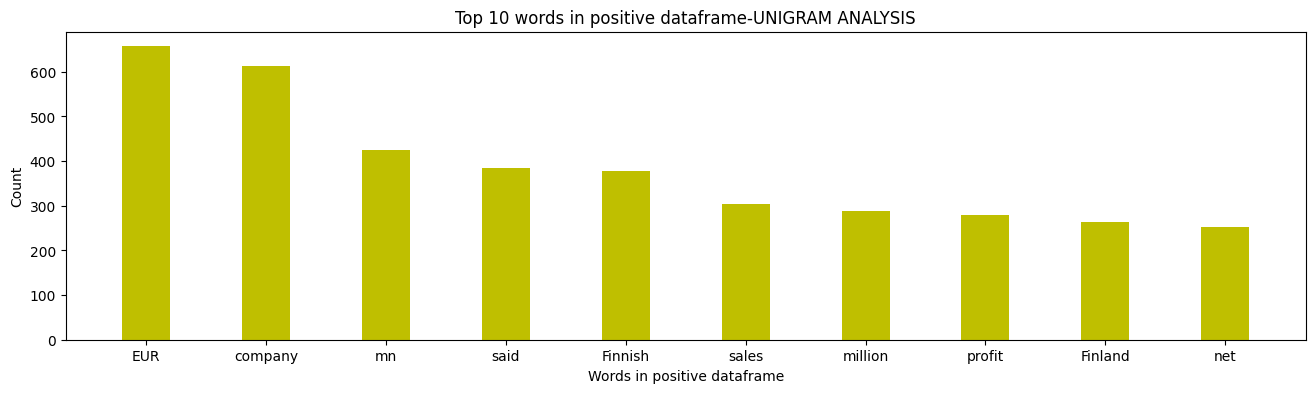

In [77]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi,color='y',width=0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()